#

In [47]:
import pandas as pd
pd.set_option('display.float_format', '{:.0f}'.format)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
#install
!pip install mlxtend

#association rule minning
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [48]:
#loading the dataset
idmb = pd.read_csv('idmb_cleaned.csv')
idmb.head()

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,28815245,2278845,9
1,tt0068646,The Godfather,1972-09-21,"Crime, Drama",175,USA,R,Francis Ford Coppola,246120974,1572674,9
2,tt0468569,The Dark Knight,2008-07-23,"Action, Crime, Drama",152,USA,PG-13,Christopher Nolan,1005455211,2241615,9
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,408035783,1098714,9
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",NaN,USA,R,Quentin Tarantino,222831817,1780147,9


In [5]:
#all data type goes back to string unless changed in notebook
idmb.dtypes

,0
IMBD title ID,object
Original titlÊ,object
Release year,object
Genrë¨,object
Duration,float64
Country,object
Content Rating,object
Director,object
Income,float64
Votes,int64


In [69]:
#calculating the company with the highest Income per movie
summary_income = idmb.groupby('Country').agg(
    Movie_Count=('Income', 'count'),
    Total_Income=('Income', 'sum'),
    Average_Income=('Income', 'mean'),
    Total_Vote = ('Votes', 'sum'),
    Average_Score = ('Score', 'mean')
).reset_index()

summary_income = summary_income.sort_values(by = 'Total_Income', ascending = False).head(10)

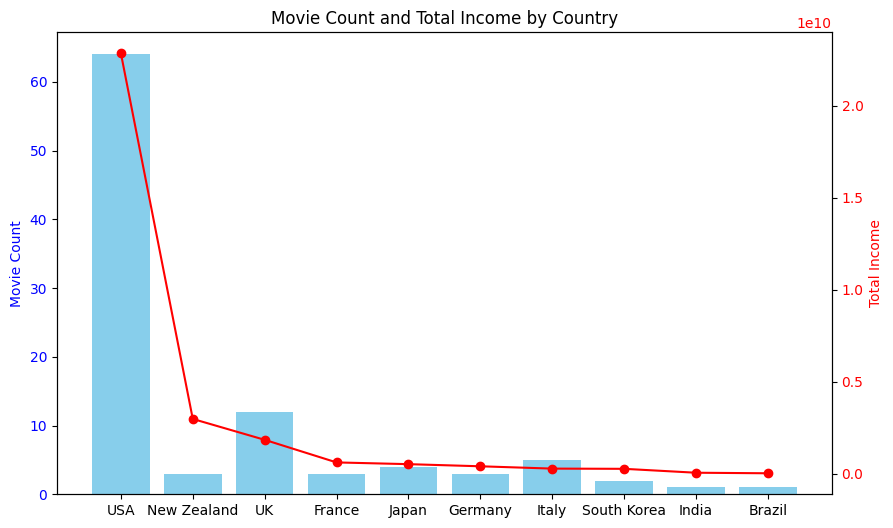

In [73]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Bar plot for Movie_Count
ax1.bar(summary_income['Country'], summary_income['Movie_Count'], color='skyblue')
ax1.set_ylabel('Movie Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis
ax2 = ax1.twinx()
ax2.plot(summary_income['Country'], summary_income['Total_Income'], color='red', marker='o')
ax2.set_ylabel('Total Income', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Movie Count and Total Income by Country')
plt.show()

Therefore New Zealand mad the highest income per movie, while USA had the overall highest income with New Zealand behind

In [118]:
#calculating which content rating made the highest income
summary_rating = idmb.groupby('Content Rating').agg(
    Movie_Count=('Income', 'count'),
    Total_Income=('Income', 'sum'),
    Average_Income=('Income', 'mean')
).reset_index()

summary_rating.sort_values(by = 'Average_Income', ascending = False)

,Content Rating,Movie_Count,Total_Income,Average_Income
3,PG-13,12,7615278645,634606554
1,G,6,3030506041,505084340
5,Unrated,25,8634558718,345382349
2,PG,11,3156416707,286946973
4,R,45,7450536519,165567478
0,Approved,1,25252481,25252481


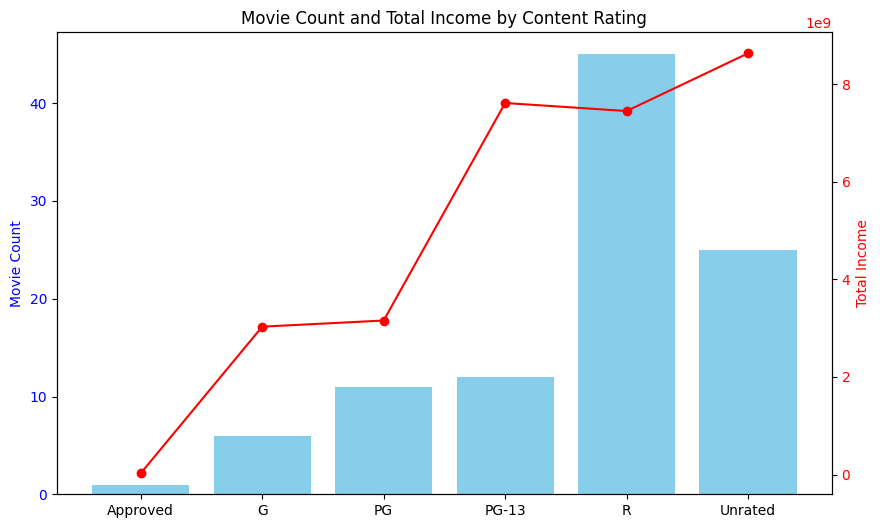

In [62]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Bar plot for Movie_Count
ax1.bar(summary_rating['Content Rating'], summary_rating['Movie_Count'], color='skyblue')
ax1.set_ylabel('Movie Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis
ax2 = ax1.twinx()
ax2.plot(summary_rating['Content Rating'], summary_rating['Total_Income'], color='red', marker='o')
ax2.set_ylabel('Total Income', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Movie Count and Total Income by Content Rating')
plt.show()


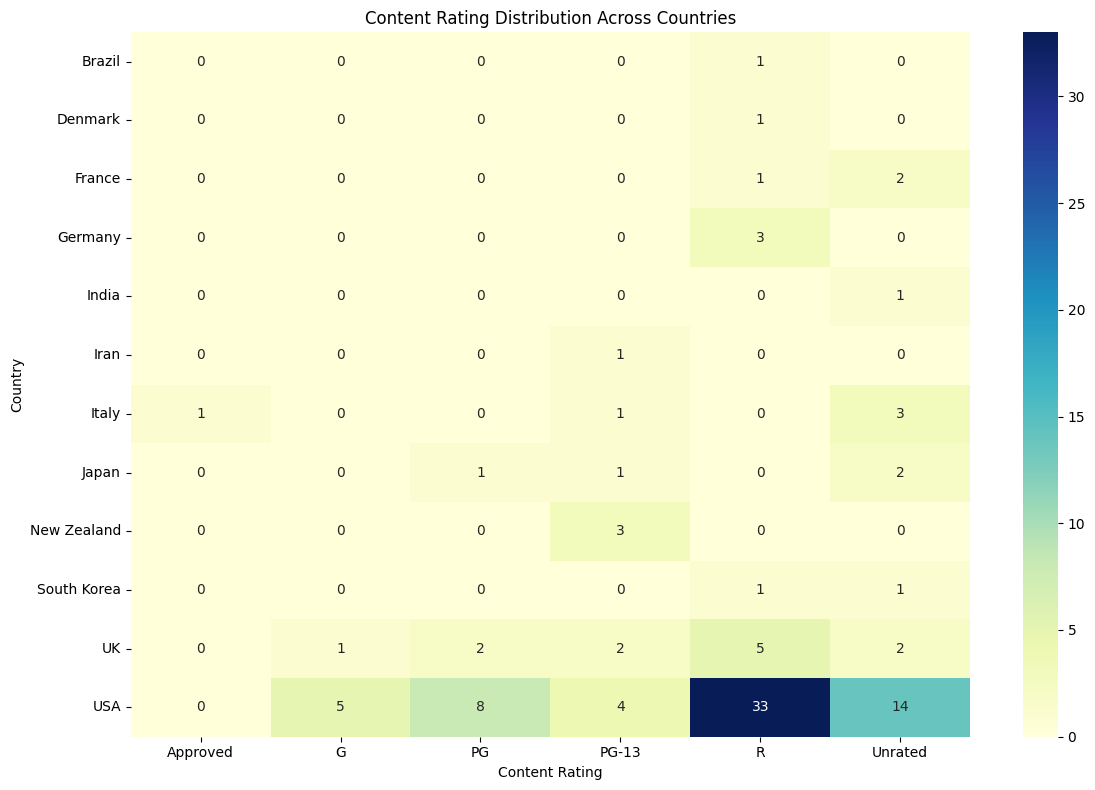

In [52]:
#content rating distribution across each country
idmb_country_rating = idmb.groupby('Country')['Content Rating'].value_counts().unstack(fill_value=0)

#visualization using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(idmb_country_rating, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Content Rating Distribution Across Countries')
plt.xlabel('Content Rating')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [88]:
#convert 'Release year' to datetime format
idmb['Release Year'] = pd.to_datetime(idmb['Release year'])

#extract the year from the datetime
#idmb['Month'] = idmb['Release Year'].dt.month

# Extract the month name
idmb['Month'] = idmb['Release Year'].dt.strftime('%B')

In [119]:
#calculating the year with the highest income
summary_month = idmb.groupby('Month').agg(
    Movie_Count=('Income', 'count'),
    Total_Income=('Income', 'sum'),
    Average_Income=('Income', 'mean')
).reset_index()
sorted_month = summary_month.sort_values(by='Average_Income', ascending=False).head(13)
sorted_month

,Month,Movie_Count,Total_Income,Average_Income
5,July,2,2072424914,1036212457
0,April,7,5345012865,763573266
4,January,7,3219578910,459939844
1,August,4,1133772383,283443096
3,February,6,1700589086,283431514
10,October,22,6072508900,276023132
11,September,10,2349872031,234987203
8,May,5,1146548302,229309660
9,November,10,2098633106,209863311
2,December,15,2899331371,193288758


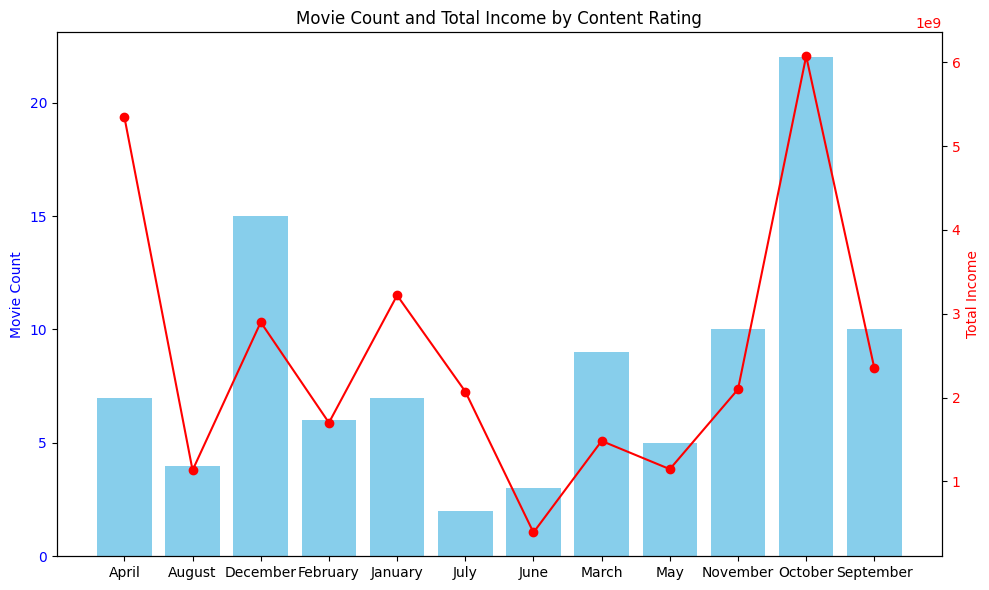

In [95]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar plot for Movie_Count
ax1.bar(summary_month['Month'], summary_month['Movie_Count'], color='skyblue')
ax1.set_ylabel('Movie Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis
ax2 = ax1.twinx()
ax2.plot(summary_month['Month'], summary_month['Total_Income'], color='red', marker='o')
ax2.set_ylabel('Total Income', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.title('Movie Count and Total Income by Content Rating')
plt.tight_layout()  # Optional: prevents label cutoff
plt.show()


In [100]:
idmb['Duration'].min()

81.0

In [110]:
idmb['Duration'].sort_values(ascending = False).head(10)

,Duration
9,inf
67,229
94,228
3,220
29,207
5,201
23,189
57,181
14,179
72,178


In [114]:
#grouping duration

#81 - 130(low), 131 - 200 (medium) & > 200 (high)
idmb['Range_Duration']= np.where(idmb['Duration'] > 200, '>200',
         np.where(idmb['Duration'] <= 130, '81 - 130', '131 - 200'))

idmb.head()

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Income,Votes,Score,Release Year,Year,Month,Range_Duration
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,28815245,2278845,9,1995-02-10,1995,February,131 - 200
1,tt0068646,The Godfather,1972-09-21,"Crime, Drama",175,USA,R,Francis Ford Coppola,246120974,1572674,9,1972-09-21,1972,September,131 - 200
2,tt0468569,The Dark Knight,2008-07-23,"Action, Crime, Drama",152,USA,PG-13,Christopher Nolan,1005455211,2241615,9,2008-07-23,2008,July,131 - 200
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,408035783,1098714,9,1975-09-25,1975,September,>200
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",NaN,USA,R,Quentin Tarantino,222831817,1780147,9,1994-10-28,1994,October,131 - 200


In [115]:
#calculating the duration with the highest income
summary_duration = idmb.groupby('Range_Duration').agg(
    Movie_Count=('Income', 'count'),
    Total_Income=('Income', 'sum'),
    Average_Income=('Income', 'mean')
).reset_index()

summary_duration = summary_duration.sort_values(by = 'Total_Income', ascending = False).head(10)
summary_duration

,Range_Duration,Movie_Count,Total_Income,Average_Income
0,131 - 200,44,17724526720,402830153
1,81 - 130,50,10484990145,209699803
2,>200,6,1703032246,283838708


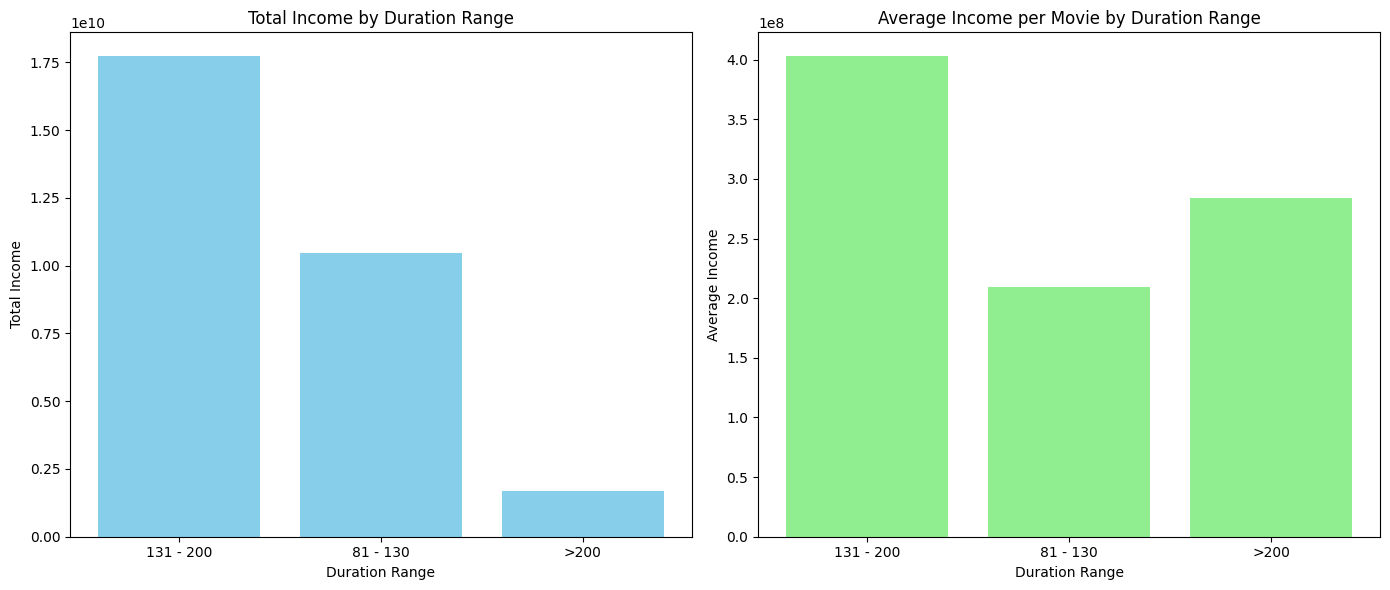

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Total income
axes[0].bar(summary_duration['Range_Duration'], summary_duration['Total_Income'], color='skyblue')
axes[0].set_title('Total Income by Duration Range')
axes[0].set_xlabel('Duration Range')
axes[0].set_ylabel('Total Income')

# Average income
axes[1].bar(summary_duration['Range_Duration'], summary_duration['Average_Income'], color='lightgreen')
axes[1].set_title('Average Income per Movie by Duration Range')
axes[1].set_xlabel('Duration Range')
axes[1].set_ylabel('Average Income')

plt.tight_layout()
plt.show()

In [12]:
#print top 10 movies with the country
idmb.sort_values(by = 'Income', ascending = False).head(10)

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Income,Votes,Score
57,tt4154796,Avengers: Endgame,2019-04-24,"Action, Adventure, Drama",181.0,USA,Unrated,"Anthony Russo, Joe Russo",2.797801e+09,754786,8.2
55,tt4154756,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149.0,USA,Unrated,"Anthony Russo, Joe Russo",2.048360e+09,796486,8.2
5,tt0167260,The Lord of the Rings: The Return of the King,2004-02-22,"Action, Adventure, Drama",201.0,New Zealand,PG-13,Peter Jackson,1.142271e+09,1604280,8.9
49,tt1345836,The Dark Knight Rises,2012-08-29,"Action, Adventure",164.0,UK,PG-13,Christopher Nolan,1.081133e+09,1480582,8.3
39,tt7286456,Joker,2019-10-03,"Crime, Drama, Thriller",122.0,USA,Unrated,Todd Phillips,1.074251e+09,855097,8.4
81,tt0435761,Toy Story 3,2010-07-07,"Animation, Adventure, Comedy",103.0,USA,G,Lee Unkrich,1.066970e+09,739717,7.8
2,tt0468569,The Dark Knight,2008-07-23,"Action, Crime, Drama",152.0,USA,PG-13,Christopher Nolan,1.005455e+09,2241615,9.0
38,tt0110357,The Lion King,1994-11-25,"Animation, Adventure, Drama",88.0,USA,G,"Roger Allers, Rob Minkoff",9.685118e+08,917248,8.4
14,tt0167261,The Lord of the Rings: The Two Towers,2003-01-16,"Action, Adventure, Drama",179.0,New Zealand,PG-13,Peter Jackson,9.512274e+08,1449778,8.7
11,tt0120737,The Lord of the Rings: The Fellowship of the Ring,2002-01-18,"Action, Adventure, Drama",178.0,New Zealand,PG-13,Peter Jackson,8.879343e+08,1619920,8.8


In [13]:
idmb.shape

(100, 11)

In [127]:
# If 'Genre' column contains 'Adventure, Animation, Fantasy'
idmb['Genre'] = idmb['Genrë¨'].str.split(', ')

# Then drop duplicates and keep one list per movie
transactions = idmb['Genre'].tolist()


# Step 3: Encode the transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

df_encoded


,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
98,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


Now using association rule minning to determine which genre of movie is most marketable.
The object
1. Determine genre with high Income (genre together and single) - make income atleast.
2. Genre attracts more people to view
3. Genre with more positive review

In [129]:
#setting the threshold
income_threshold = idmb['Income'].median()
votes_threshold = idmb['Votes'].median()
score_threshold = idmb['Score'].median()

#setting maximum values for each objective
df_encoded['High_Income'] = idmb['Income'] >= income_threshold
df_encoded['High_Votes'] = idmb['Votes'] >= votes_threshold
df_encoded['High_Score'] = idmb['Score'] >= score_threshold

In [130]:
df_encoded.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,High_Income,High_Votes,High_Score
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,True,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,True,True,True


In [131]:
#generate frequent itemsets
frequent_items = apriori(df_encoded, min_support = 0.05, use_colnames = True)

#generating rules with at least one of the target labels as the consequent
rules = association_rules(frequent_items, metric = 'confidence', min_threshold = 0.6)

rules.sort_values(by= 'confidence', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,(Biography),(Drama),0,1,0,1,1,1,0,inf,0,0,1,1
13,(War),(Drama),0,1,0,1,1,1,0,inf,0,0,1,1
64,"(High_Income, Crime)",(Drama),0,1,0,1,1,1,0,inf,0,0,1,1
59,"(High_Votes, Adventure)",(High_Income),0,0,0,1,2,1,0,inf,1,0,1,1
51,"(Animation, Adventure)",(High_Income),0,0,0,1,2,1,0,inf,1,0,1,1
50,"(High_Income, Animation)",(Adventure),0,0,0,1,3,1,0,inf,1,0,1,1
40,"(Sci-Fi, Action)",(High_Income),0,0,0,1,2,1,0,inf,1,0,1,1
91,"(Sci-Fi, High_Score)",(High_Votes),0,0,0,1,2,1,0,inf,1,0,1,1
90,"(Sci-Fi, High_Score)",(High_Income),0,0,0,1,2,1,0,inf,1,0,1,1
70,"(Thriller, Crime)",(High_Votes),0,0,0,1,2,1,0,inf,1,0,1,1


In [132]:
rules.sort_values(by= 'lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
192,"(High_Income, Action, Drama)","(High_Votes, Adventure)",0,0,0,1,5,1,0,5,1,0,1,1
199,"(High_Votes, Adventure, High_Score)","(High_Income, Action)",0,0,0,1,4,1,0,3,1,0,1,1
200,"(High_Income, Adventure, High_Score)","(High_Votes, Action)",0,0,0,1,4,1,0,3,1,0,1,1
204,"(Adventure, High_Score)","(High_Income, High_Votes, Action)",0,0,0,1,4,1,0,2,1,0,1,1
203,"(High_Income, Action, High_Score)","(High_Votes, Adventure)",0,0,0,1,4,1,0,3,1,0,1,1
71,"(Thriller, High_Votes)",(Crime),0,0,0,1,4,1,0,5,1,0,1,1
109,"(High_Income, Action)","(High_Votes, Adventure)",0,0,0,1,4,1,0,3,1,1,1,1
112,"(High_Votes, Adventure)","(High_Income, Action)",0,0,0,1,4,1,0,2,1,1,1,1
189,"(High_Income, Adventure, Drama)","(High_Votes, Action)",0,0,0,1,4,1,0,2,1,0,1,0
124,"(Adventure, High_Score)","(Action, High_Votes)",0,0,0,1,4,1,0,2,1,0,1,1


In [133]:
#filter for rules where High Income, High Votes or High Score is the consequence
rules_target = rules[rules['consequents'].apply(lambda x: any(item in x for item in ['High_Income', 'High_Votes', 'High_Score']))]

rules_target

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(Action),(High_Income),0,0,0,1,2,1,0,3,1,0,1,1
2,(Action),(High_Votes),0,0,0,1,2,1,0,2,0,0,1,1
3,(Action),(High_Score),0,1,0,1,1,1,0,1,0,0,0,0
5,(Adventure),(High_Income),0,0,0,1,2,1,0,3,1,0,1,1
6,(Adventure),(High_Votes),0,0,0,1,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,"(High_Income, Crime, High_Score)","(High_Votes, Drama)",0,0,0,1,3,1,0,inf,1,0,1,1
227,"(Drama, Crime, High_Score)","(High_Income, High_Votes)",0,0,0,1,2,1,0,2,1,0,1,0
228,"(High_Votes, Crime)","(High_Income, Drama, High_Score)",0,0,0,1,3,1,0,2,1,0,1,1
229,"(High_Income, Crime)","(High_Votes, Drama, High_Score)",0,0,0,1,3,1,0,7,1,0,1,1


Confidence: probability of outcome given the genre combination

Lift:how much likely the outcome is compared to random chance

support: proportion of movies with that genre combo.

In [134]:
rules_target.sort_values(by = 'lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
192,"(High_Income, Action, Drama)","(High_Votes, Adventure)",0,0,0,1,5,1,0,5,1,0,1,1
199,"(High_Votes, Adventure, High_Score)","(High_Income, Action)",0,0,0,1,4,1,0,3,1,0,1,1
200,"(High_Income, Adventure, High_Score)","(High_Votes, Action)",0,0,0,1,4,1,0,3,1,0,1,1
204,"(Adventure, High_Score)","(High_Income, High_Votes, Action)",0,0,0,1,4,1,0,2,1,0,1,1
203,"(High_Income, Action, High_Score)","(High_Votes, Adventure)",0,0,0,1,4,1,0,3,1,0,1,1
109,"(High_Income, Action)","(High_Votes, Adventure)",0,0,0,1,4,1,0,3,1,1,1,1
112,"(High_Votes, Adventure)","(High_Income, Action)",0,0,0,1,4,1,0,2,1,1,1,1
189,"(High_Income, Adventure, Drama)","(High_Votes, Action)",0,0,0,1,4,1,0,2,1,0,1,0
124,"(Adventure, High_Score)","(Action, High_Votes)",0,0,0,1,4,1,0,2,1,0,1,1
52,(Animation),"(High_Income, Adventure)",0,0,0,1,4,1,0,7,1,0,1,1


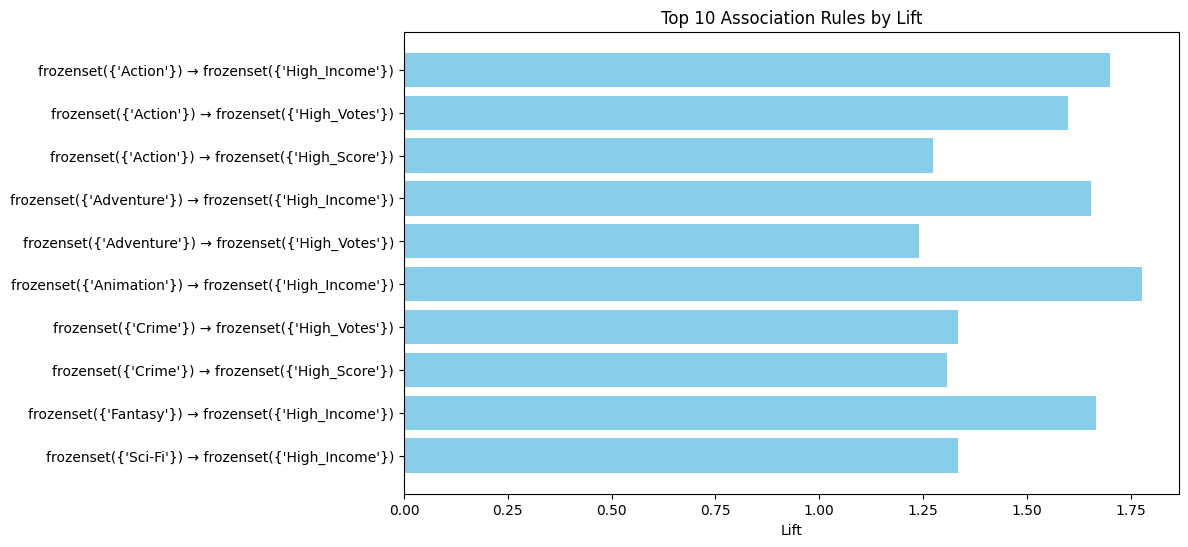

In [136]:
# Top 10 rules by lift
top_rules = rules_target.head(10)

plt.figure(figsize=(10,6))
plt.barh(range(len(top_rules)), top_rules['lift'], color='skyblue')
plt.yticks(range(len(top_rules)), top_rules['antecedents'].astype(str) + " → " + top_rules['consequents'].astype(str))
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()
